# Set Cover problem

In [199]:
from itertools import accumulate
import numpy as np
from tqdm.auto import tqdm
from matplotlib import pyplot as plt

from icecream import ic

UNIVERSE_SIZE = 100_000
NUM_SETS = 10_000
DENSITY = 0.3

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

# DON'T EDIT THESE LINES!

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)

def valid(solution):
    """Checks wether solution is valid (ie. covers all universe)"""
    return np.all(np.logical_or.reduce(SETS[solution]))


def cost(solution):
    """Returns the cost of a solution (to be minimized)"""
    return COSTS[solution].sum()

## Fitness function

In [200]:
def fitness(solution):
    return (valid(solution), -cost(solution))

# Multiple Mutation Hill Climber

In [201]:
def tweak(solution):
    new_solution = solution.copy()
    index = None
    while index is None or np.random.random() < 0.5:
        index = np.random.randint(0, NUM_SETS)
        new_solution[index] = not new_solution[index]
    return new_solution

In [202]:
def hill_climber():
    solution = rng.random(NUM_SETS) < 1
    ic(valid(solution), cost(solution))
    solution_fitness = fitness(solution)
    history = [solution_fitness[1]]


    for steps in range(10_000):
        # TWEAK
        temp = tweak(solution)
        f = fitness(temp)
        history.append(f[1])

        if f > solution_fitness:
            solution = temp
            solution_fitness = f
    ic(valid(solution), cost(solution))
    return solution, history
None

# Improved Multiple Mutation Hill Climber

In [203]:
def tweak_strength(solution: np.ndarray, strength: float = 0.3) -> np.ndarray:
    mask = rng.random(NUM_SETS) < strength
    if not np.any(mask):
        mask[np.random.randint(NUM_SETS)] = True
    new_solution = np.logical_xor(solution, mask)
    return new_solution

In [204]:
def improved_hill_climber():
    solution = rng.random(NUM_SETS) < 0.3
    BUFFER_SIZE = 13
    solution_fitness = fitness(solution)
    history = [float(solution_fitness[1])]
    ic(valid(solution), cost(solution))

    strength = 0.5
    buffer = list()

    for steps in range(10_000):
        new_solution = tweak_strength(solution, strength)
        f = fitness(new_solution)
        history.append(float(f[1]))
        buffer.append(f > solution_fitness)

        buffer = buffer[-BUFFER_SIZE:]
        if sum(buffer) > BUFFER_SIZE / 2:
            strength *= 1.2
        elif sum(buffer) < BUFFER_SIZE / 2:
            strength /= 1.2

        if (f > solution_fitness):
            solution = new_solution
            solution_fitness = fitness(solution)

    ic(valid(solution), cost(solution))
    return solution, history
None

#  Simulated Annealing

In [205]:
def tweak_simuled_annealing(solution):
    new_solution = solution.copy()
    index = np.random.randint(0, NUM_SETS)
    new_solution[index] = not new_solution[index]
    return new_solution

In [206]:
def simulated_annealing():
    current_solution = rng.random(NUM_SETS) < 0.3
    current_fitness = fitness(current_solution)
    best_solution = current_solution.copy()
    best_fitness = current_fitness
    ic(valid(current_solution), cost(current_solution))


    temperature = 1000
    cooling_rate=0.995
    min_temp=1e-3
    steps_without_improvement = 0
    history = [float(current_fitness[1])]

    for step in range(10_000):
        new_solution = tweak_simuled_annealing(current_solution)
        new_fitness = fitness(new_solution)
        history.append(float(new_fitness[1]))
        
        # Always accept if new solution is better
        if new_fitness > current_fitness:
            current_solution = new_solution
            current_fitness = new_fitness
            steps_without_improvement = 0
        else:
            # Probabilistically accept worse solutions (exploration)
            delta_cost = new_fitness[1] - current_fitness[1]
            log_acceptance_prob = delta_cost / temperature
            acceptance_prob = np.exp(log_acceptance_prob) if log_acceptance_prob < 0 else 1.0
            if np.random.random() < acceptance_prob:
                current_solution = new_solution
                current_fitness = new_fitness
            steps_without_improvement += 1

        # Update the best solution found
        if current_fitness > best_fitness:
            best_solution = current_solution.copy()
            best_fitness = current_fitness
        
        # Reduce temperature
        temperature = max(temperature * cooling_rate, min_temp)


    ic(valid(best_solution), cost(best_solution))
    return best_solution, history
None

# Choose the algorithm

In [211]:
def choose_algorithm():
    if UNIVERSE_SIZE <= 1000 and DENSITY <= 0.2:
        return hill_climber
    elif UNIVERSE_SIZE > 1000 and DENSITY >= 0.2:
        return simulated_annealing
    else:
        return improved_hill_climber
    
algorithm = choose_algorithm()
solution, history = algorithm()

ic| valid(current_solution): np.True_
    cost(current_solution): np.float64(256958289.00127825)
ic| valid(best_solution): np.True_
    cost(best_solution): np.float64(94205112.08905461)


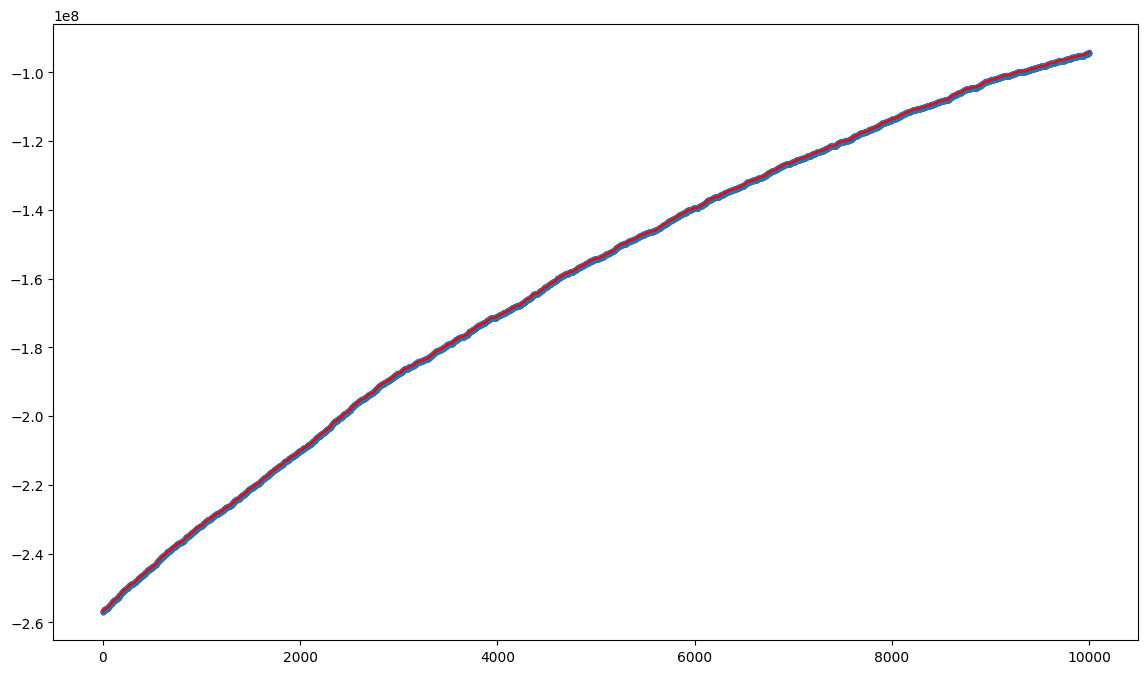

In [212]:
plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")

254
94
4 minutes